In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Heart Attack Data: Combining Datasets
Two of our datasets are collected from different sources and have similar features. We will look into combining the two datasets before collectively cleaning them to get a bigger, processed dataset.

## data.csv
https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction

The dataset contains the following features:
1. (age) 
2. (sex) 
3. (cp) Chest pain
4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) serum cholestoral in mg/dl
6. (fbs) (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg) resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach) maximum heart rate achieved
9. (exang) exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) ST depression induced by exercise relative to rest
11. (slope) slope: the slope of the peak exercise ST segment
  - Value 0: upsloping
  - Value 1: flat
  - Value 2: downsloping
12. (ca) number of major vessels (0-3) colored by flourosopy
13. (thal) 
  - 0 = normal 
  - 1 = fixed defect
  - 2 = reversable defect
and the label
14. (num) (the predicted attribute)

In [86]:
# load data_sets into pandas dataframes
first_dataset = pd.read_csv('./data/raw/data.csv')
second_dataset = pd.read_csv('./data/raw/data_cleveland.csv')

In [87]:
# let us see what the datasets look like
first_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


## data_cleveland.csv
https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/

this data has the same columns as the previous one except the predicted column which is named "condition"

In [88]:
# Let us see what the second dataset looks like
second_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Combining Datasets

In [89]:
# Looking at the data, we can see that the datasets are very similar. The only difference being the target column name.
# Let us rename the target column in the first dataset so both of them match
first_dataset = first_dataset.rename(columns={'num ': 'target'})
first_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [90]:
# Now that we have renamed the target column, let us combine the two datasets into one
data = pd.concat([first_dataset, second_dataset])

In [91]:
data = data.replace('?', np.nan)
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       591 non-null    int64  
 1   sex       591 non-null    int64  
 2   cp        591 non-null    int64  
 3   trestbps  590 non-null    object 
 4   chol      568 non-null    object 
 5   fbs       583 non-null    object 
 6   restecg   590 non-null    object 
 7   thalach   590 non-null    object 
 8   exang     590 non-null    object 
 9   oldpeak   591 non-null    float64
 10  slope     401 non-null    object 
 11  ca        300 non-null    object 
 12  thal      325 non-null    object 
 13  target    591 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 69.3+ KB


1. Almost all values of ca and thal are missing. So we will need to drop these columns
2. trestbps and chol are numerical values so we will replace the missing values with the mean of the column
3. slope is a categorical value so we will replace the missing values with the mode of the column

## Correcting data types

In [92]:
data.trestbps = data.trestbps.astype(float)
data.chol = data.chol.astype(float)
data.thalach = data.thalach.astype(float)

## Fill missing values

In [93]:
data.trestbps.fillna(data.trestbps.mean(), inplace=True)
data.chol.fillna(data.chol.mean(), inplace=True)
data.slope.fillna(data.slope.mode()[0], inplace=True)
data.fbs.fillna(data.fbs.mode()[0], inplace=True)
data.restecg.fillna(data.restecg.mode()[0], inplace=True)
data.thalach.fillna(data.thalach.mean(), inplace=True)
data.exang.fillna(data.exang.mode()[0], inplace=True)
data.ca.fillna(data.ca.mode()[0], inplace=True)
data.thal.fillna(data.thal.mode()[0], inplace=True)

## Correct data types

In [94]:
data.sex = data.sex.astype(object)
data.cp = data.cp.astype(object)
# data.fbs = data.fbs.astype(object)
# data.ca = data.ca.astype(object)
# data.thal = data.thal.astype(object)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       591 non-null    int64  
 1   sex       591 non-null    object 
 2   cp        591 non-null    object 
 3   trestbps  591 non-null    float64
 4   chol      591 non-null    float64
 5   fbs       591 non-null    object 
 6   restecg   591 non-null    object 
 7   thalach   591 non-null    float64
 8   exang     591 non-null    object 
 9   oldpeak   591 non-null    float64
 10  slope     591 non-null    object 
 11  ca        591 non-null    object 
 12  thal      591 non-null    object 
 13  target    591 non-null    int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 69.3+ KB


In [96]:
data.to_csv('./data/processed/combined.csv', index=False)

On surface level there are no missing values now let us take a deeper look at the histograms to find anomalies, if any

As there are no anomalies we can move on to the next dataset

# Heart Disease Prediction

In [97]:
# read our data 
heart = pd.read_csv('./data/raw/heart_disease.csv')

In [98]:
# let us see what the data looks like
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [99]:
# correcting data type
heart.FastingBS = heart.FastingBS.astype(object)

## Visualizing the data
Again there are no missing values in this data. Let us take a deeper look at the histograms of the data features to identify some anomalies

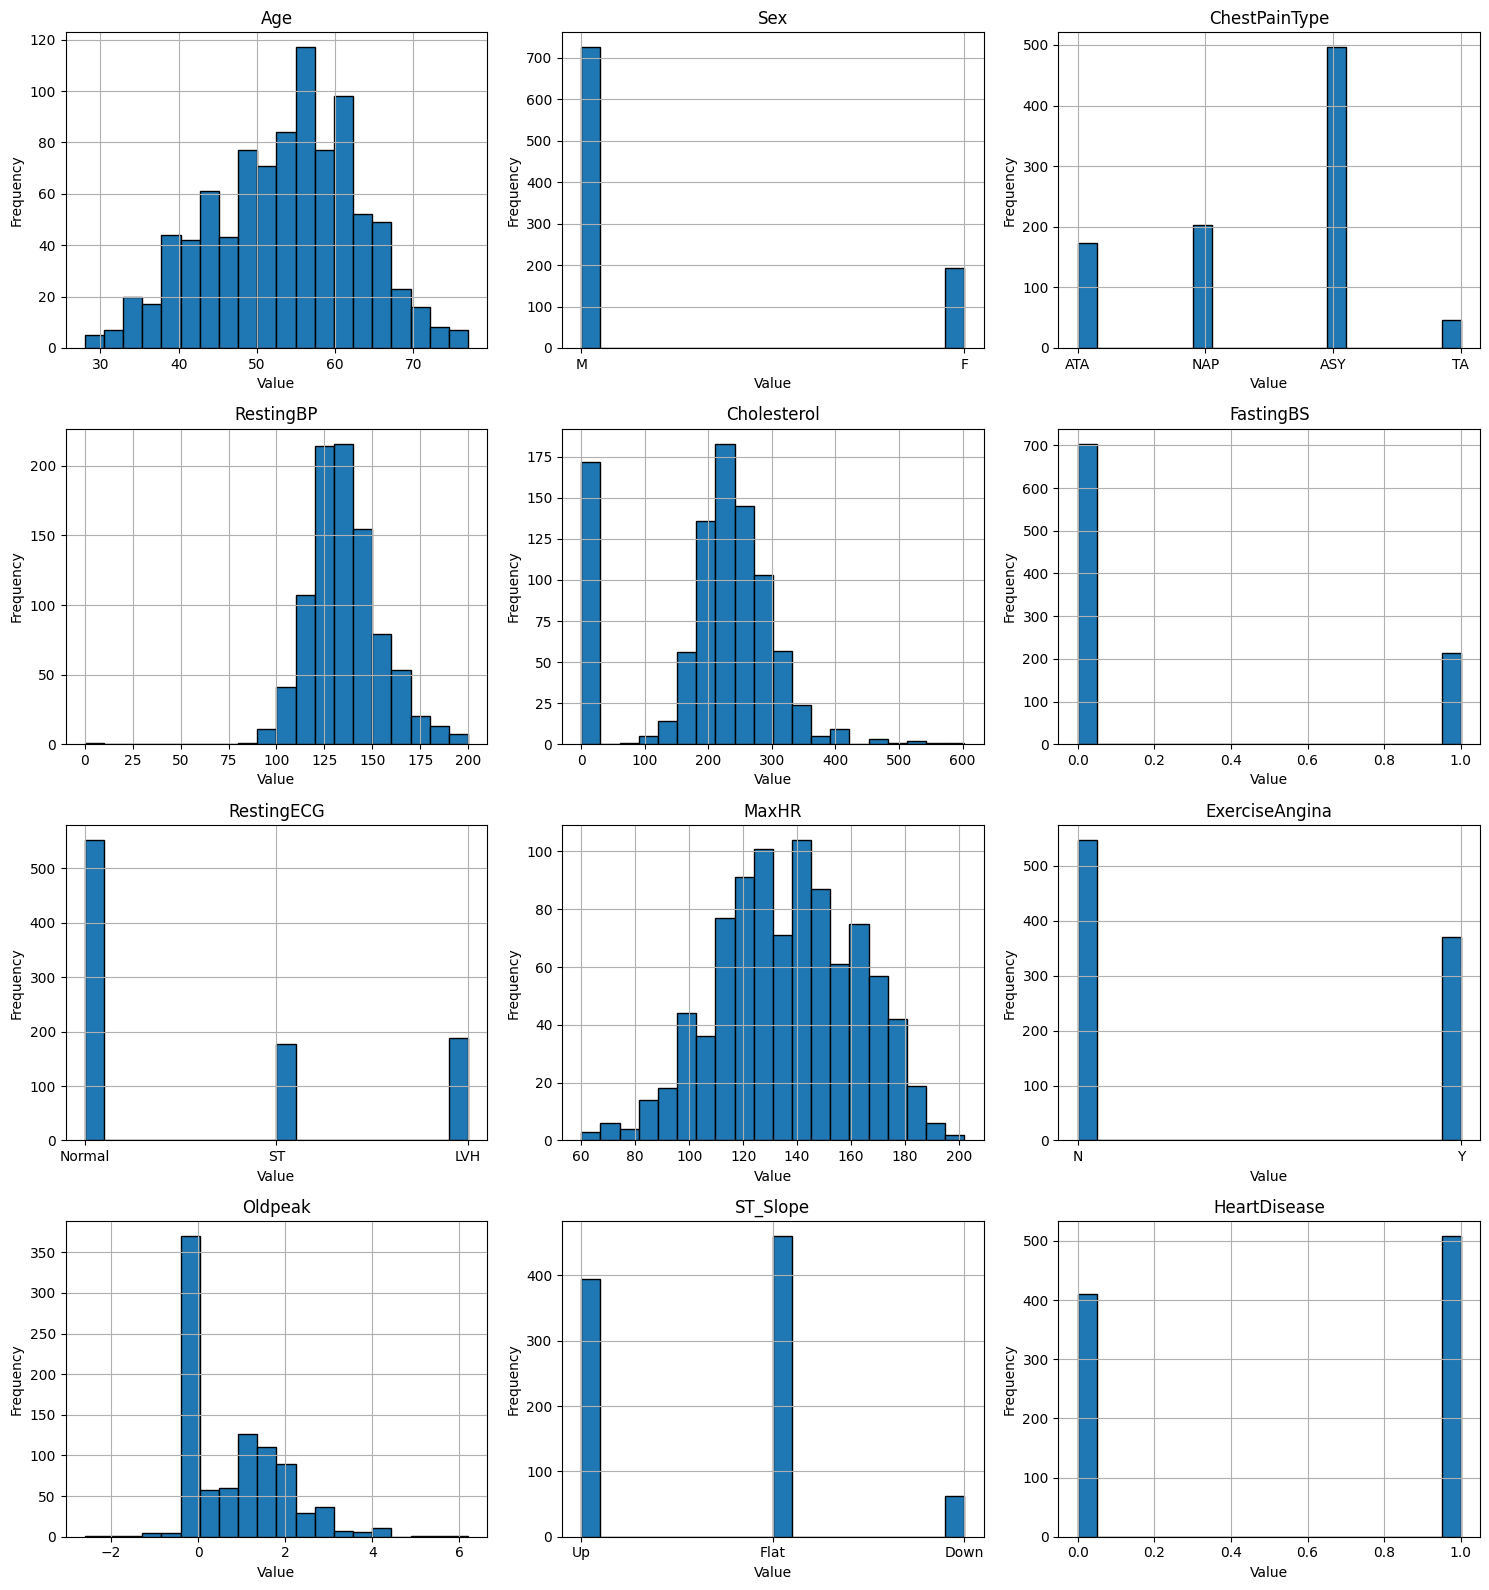

In [100]:
# Number of columns and setting up the plot dimensions
num_cols = heart.shape[1]
cols_per_row = 3
num_rows = num_cols // cols_per_row + (num_cols % cols_per_row > 0)

# Create a histogram for each column
plt.figure(figsize=(15, num_rows * 4))
for i, column in enumerate(heart.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    heart[column].hist(bins=20, edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

As we can see from the histograms of cholestrol and oldpeak that there is a peak at 0.0 that is seperate from the normal distribution. This is probably because the data is missing and the missing values are represented by 0.0. So we will replace the 0.0 values with NaN values. 

<Axes: >

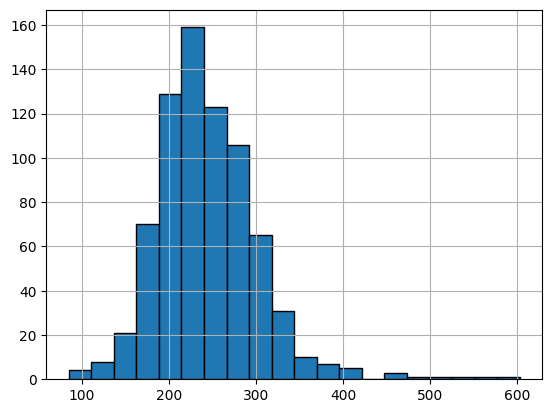

In [101]:
heart.Cholesterol.replace(0.0, np.nan, inplace=True)
heart.Cholesterol.hist(bins=20, edgecolor='black')

however in the case of oldpeak the peak at 0.0 is expected as it is usually the case that people with heart disease have no ST depression induced by exercise relative to rest. We can confirm this by plotting the histogram of oldpeak for the previous dataset. So we will not be making changes to the oldpeak column.

<Axes: >

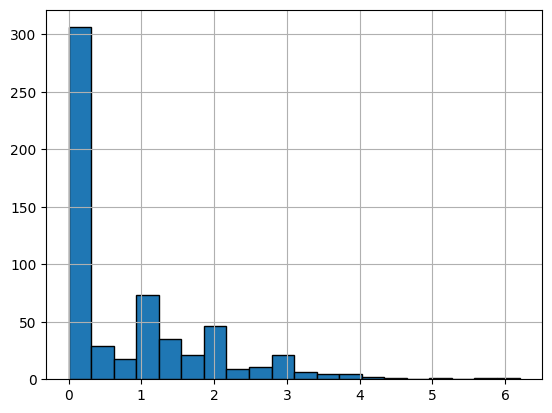

In [102]:
data.oldpeak.hist(bins=20, edgecolor='black')

## Create missing values
As there are no missing values in the data we will create some missing values to test the imputation methods

In [103]:
# columns from which we dont want to remove any values
excluded_column = ['HeartDisease', 'Sex', 'Cholesterol']

# Create a list of (row, column) pairs for potential deletion
pairs_to_delete = [(row, col) for row in range(heart.shape[0]) 
                   for col in heart.columns if col not in excluded_column]

# Calculate 15% of these pairs
num_pairs_to_delete = int(len(pairs_to_delete) * 0.15)

# Randomly select pairs and set those values to NaN
for _ in range(num_pairs_to_delete):
    row, col = random.choice(pairs_to_delete)
    heart.at[row, col] = np.nan
    # Remove the selected pair to avoid repetition
    pairs_to_delete.remove((row, col))


In [104]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             811 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   764 non-null    object 
 3   RestingBP       765 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       775 non-null    object 
 6   RestingECG      781 non-null    object 
 7   MaxHR           772 non-null    float64
 8   ExerciseAngina  789 non-null    object 
 9   Oldpeak         787 non-null    float64
 10  ST_Slope        779 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 86.2+ KB


## Imputing missing values

In [105]:
heart.Age.fillna(heart.Age.mean(), inplace=True)
heart.ChestPainType.fillna(heart.ChestPainType.mode()[0], inplace=True)
heart.RestingBP.fillna(heart.RestingBP.mean(), inplace=True)
heart.Cholesterol.replace(0.0, np.nan, inplace=True)
heart.Cholesterol.fillna(heart.Cholesterol.mean(), inplace=True)
heart.FastingBS.fillna(heart.FastingBS.mode()[0], inplace=True)
heart.RestingECG.fillna(heart.RestingECG.mode()[0], inplace=True)
heart.MaxHR.fillna(heart.MaxHR.mean(), inplace=True)
heart.ExerciseAngina.fillna(heart.ExerciseAngina.mode()[0], inplace=True)
heart.Oldpeak.fillna(heart.Oldpeak.mean(), inplace=True)
heart.ST_Slope.fillna(heart.ST_Slope.mode()[0], inplace=True)

In [106]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


## Write to csv

In [107]:
heart['target'] = heart['HeartDisease']
heart = heart.drop(['HeartDisease'], axis=1)
heart.to_csv('./data/processed/heart_diease.csv', index=False)